In [2]:
%reset
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from functions import CFloader, splt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import sqrt

savedir = "B01/"

In [4]:
data = CFloader.load_data( "CloudVenetoAnalysis/default_20220510" )
# data = CFloader.load_data( "AcerAnalysis/default_20220509_0" )

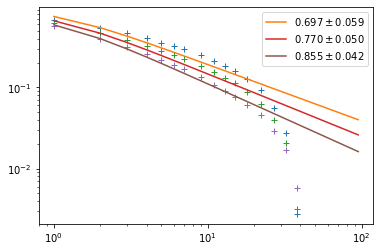

In [5]:
for d in data:
    x = np.array( d['CF_D']['x'] )
    y = np.array( d['CF_D']['y'] ) / d['side'] / d['side']
    plt.plot( x,  y, '+' )

    def f( x, A, gamma ):
        return A * ( 1 + x**2 ) ** ( - gamma / 2 )
    p, pc = curve_fit( f, x, y, [ y[0], 0.2 ] )
    y2 = f( x, p[0], p[1] )

    plt.plot( x, y2, label = fr"${p[1]:.3f} \pm {sqrt(pc[1,1]):.3f}$" ) 
    plt.xscale( 'log' )
    plt.yscale( 'log' )
    plt.legend()

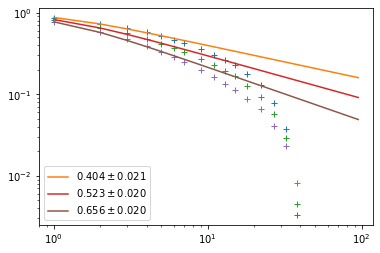

In [10]:
for d in data:
    x = np.array( d['CF_H']['x'] )
    y = np.array( d['CF_H']['y'] ) / d['side'] / d['side']
    plt.plot( x,  y, '+' )

    def f( x, A, gamma ):
        return A * ( 1 + x**2 ) ** ( - gamma / 2 )
    p, pc = curve_fit( f, x[ x < 7 ], y[ x < 7 ], [ y[0], 0.2 ] )
    y2 = f( x, p[0], p[1] )

    plt.plot( x, y2, label = fr"${p[1]:.3f} \pm {sqrt(pc[1,1]):.3f}$" ) 
    plt.xscale( 'log' )
    plt.yscale( 'log' )
    plt.legend()

In [9]:
d['CF_H']

,x,y
0,1,12556.500
1,2,9475.890
2,3,7745.370
3,4,6333.030
4,5,5344.330
5,6,4660.620
6,7,4128.940
7,9,3288.490
8,11,2665.290
9,13,2206.880
